In [1]:
import pandas as pd
import numpy as np
import sonny_acquire
import prepare
import acquire

In [2]:
df = pd.read_csv('new_repos_dict.csv')
df['category'] = 'unknown'
df.loc[:100, 'category'] = 'solar_energy'
df.loc[100:200, 'category'] = 'petroleum'
df.loc[200:, 'category'] = 'natural_gas'
df = df[['language','category','repo','readme_contents']]

In [3]:
df = prepare.prep_repo_data(df)

In [4]:
df = df[df.index!=135]
df = df[df.index!=269]

In [5]:
df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,C,solar_energy,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...
1,OCaml,solar_energy,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...
2,TypeScript,solar_energy,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...
3,Python,solar_energy,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...
4,Go,solar_energy,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...
...,...,...,...,...,...,...,...
595,Jupyter Notebook,natural_gas,souvikb07/solar-energy-cost-calculator-models,# solar-energy-cost-calculator-models\n\n### W...,"[solarenergycostcalculatormodels, work, in, pr...",solarenergycostcalculatormodel work progress,solarenergycostcalculatormodels work progress
596,CSS,natural_gas,suwalka/ushasolarpower,# usp\nClient site based on solar energy produ...,"[usp, client, site, based, on, solar, energy, ...",usp client site base solar energi product,usp client site based solar energy product
597,NaN,natural_gas,sahirnadeem/Solar-Energy-Engineering-TUDelft-M...,# Solar-Energy-Engineering-TUDelft-MicroMaster...,[solarenergyengineeringtudelftmicromastersprog...,solarenergyengineeringtudelftmicromastersprogr...,solarenergyengineeringtudelftmicromastersprogr...
598,HTML,natural_gas,kerrongordon/gsetri,# Generator-jekyllrb \n\n[![Build Status](http...,"[generatorjekyllrb, build, statushttpstravisci...",generatorjekyllrb build statushttpstravisciorg...,generatorjekyllrb build statushttpstravisciorg...


In [6]:
df.dropna(inplace=True)
df.drop(df.index[15], inplace=True)

In [7]:
df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,C,solar_energy,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...
1,OCaml,solar_energy,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...
2,TypeScript,solar_energy,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...
3,Python,solar_energy,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...
4,Go,solar_energy,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...
...,...,...,...,...,...,...,...
594,JavaScript,natural_gas,sukanyavenkataraman/enerhack,# Enerhack\n\nCode for communicating between t...,"[enerhack, code, for, communicating, between, ...",enerhack code commun energyan dahsboard,enerhack code communicating energyan dahsboard
595,Jupyter Notebook,natural_gas,souvikb07/solar-energy-cost-calculator-models,# solar-energy-cost-calculator-models\n\n### W...,"[solarenergycostcalculatormodels, work, in, pr...",solarenergycostcalculatormodel work progress,solarenergycostcalculatormodels work progress
596,CSS,natural_gas,suwalka/ushasolarpower,# usp\nClient site based on solar energy produ...,"[usp, client, site, based, on, solar, energy, ...",usp client site base solar energi product,usp client site based solar energy product
598,HTML,natural_gas,kerrongordon/gsetri,# Generator-jekyllrb \n\n[![Build Status](http...,"[generatorjekyllrb, build, statushttpstravisci...",generatorjekyllrb build statushttpstravisciorg...,generatorjekyllrb build statushttpstravisciorg...


In [8]:
df.category.value_counts()

natural_gas     287
solar_energy     62
petroleum        59
Name: category, dtype: int64

In [9]:
#df = acquire.scrape_github_data()

In [10]:
#df

In [11]:
#df = pd.DataFrame(df)

In [12]:
#df

In [13]:
#df.dtypes

In [14]:
#df.head()

In [15]:
# prepare data
#df = prepare.prep_repo_data(df)

In [16]:
#df

In [17]:
#df.dtypes

In [18]:
#df.info()

In [19]:
#df.language.value_counts()

In [20]:
# plt.figure(figsize=(16,8))
# df.language.value_counts().head(15).plot.barh(width=.9, ec='black', title='15 most popular language  repos')
# plt.xlabel('Number of occurances')

## Exploration

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import nltk.sentiment
import re

Text(0.5, 0, 'Number of occurances')

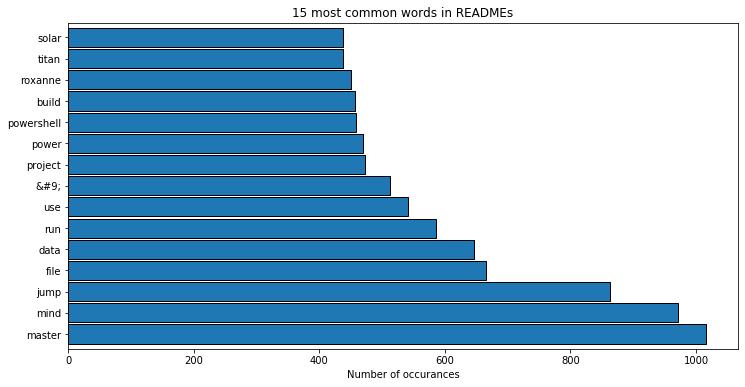

In [22]:
# What are the most common words in READMEs?
all_words = ' '.join(df.clean_lemmatized).split()
plt.figure(figsize=(12,6))
pd.Series(all_words).value_counts().head(15).plot.barh(width=.9, ec='black', title='15 most common words in READMEs')
plt.xlabel('Number of occurances')

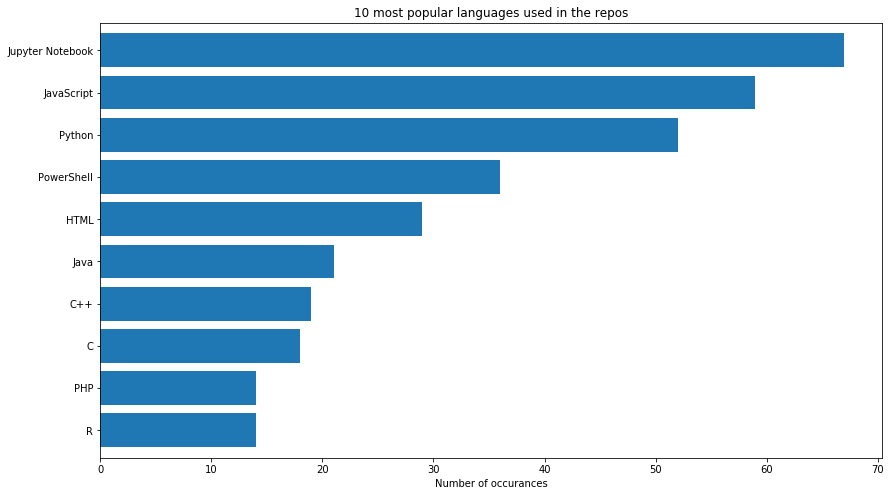

In [23]:
plt.figure(figsize=(14,8))
df.language.value_counts().sort_values(ascending=True).tail(10).plot.barh(width=.8)
plt.title('10 most popular languages used in the repos')
plt.xlabel('Number of occurances')
plt.show()

- Does the length of the README vary by programming language?

In [24]:
#feature engineering, add a new feature as clean_lemmatized_length
df["clean_lemmatized_length"] = df.clean_lemmatized.apply(len)

In [25]:
df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized,clean_lemmatized_length
0,C,solar_energy,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,1015
1,OCaml,solar_energy,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...,3544
2,TypeScript,solar_energy,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...,269
3,Python,solar_energy,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...,586
4,Go,solar_energy,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...,1760
...,...,...,...,...,...,...,...,...
594,JavaScript,natural_gas,sukanyavenkataraman/enerhack,# Enerhack\n\nCode for communicating between t...,"[enerhack, code, for, communicating, between, ...",enerhack code commun energyan dahsboard,enerhack code communicating energyan dahsboard,46
595,Jupyter Notebook,natural_gas,souvikb07/solar-energy-cost-calculator-models,# solar-energy-cost-calculator-models\n\n### W...,"[solarenergycostcalculatormodels, work, in, pr...",solarenergycostcalculatormodel work progress,solarenergycostcalculatormodels work progress,45
596,CSS,natural_gas,suwalka/ushasolarpower,# usp\nClient site based on solar energy produ...,"[usp, client, site, based, on, solar, energy, ...",usp client site base solar energi product,usp client site based solar energy product,42
598,HTML,natural_gas,kerrongordon/gsetri,# Generator-jekyllrb \n\n[![Build Status](http...,"[generatorjekyllrb, build, statushttpstravisci...",generatorjekyllrb build statushttpstravisciorg...,generatorjekyllrb build statushttpstravisciorg...,172


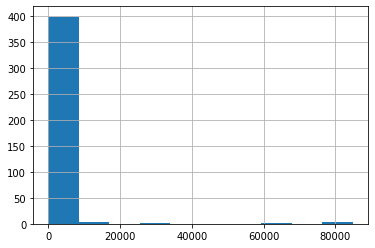

In [26]:
df.clean_lemmatized_length.hist()

In [27]:
# get top 10 popular languages
top_language = list(df.language.value_counts().head(10).index)
top_language
df[df.language.isin(top_language)].language

0                     C
3                Python
5                     C
8      Jupyter Notebook
9                Python
             ...       
591              Python
594          JavaScript
595    Jupyter Notebook
598                HTML
599                 PHP
Name: language, Length: 329, dtype: object

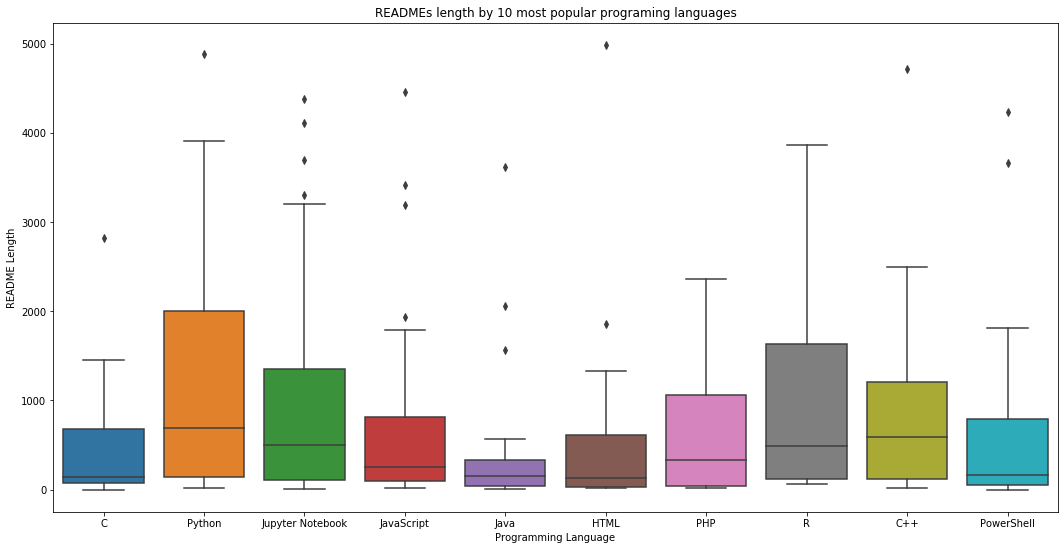

In [28]:
plt.figure(figsize=(18,9))
sns.boxplot(y=df[df.clean_lemmatized_length < 5000].clean_lemmatized_length, x=df[df.language.isin(top_language)].language)
plt.title("READMEs length by 10 most popular programing languages")
plt.xlabel('Programming Language')
plt.ylabel('README Length')
plt.show()

In [29]:
# # What are the most common words in READMEs?
# all_words = ' '.join(df.clean_lemmatized).split()
# plt.figure(figsize=(12,6))
# pd.Series(all_words).value_counts().head(15).plot.barh(width=.9, ec='black', title='15 most common words in READMEs')
# plt.xlabel('Number of occurances')

## Hypothesis Testing 

### Chi Square test

In [30]:
from scipy import stats

In [31]:
df.head()

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized,clean_lemmatized_length
0,C,solar_energy,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,1015
1,OCaml,solar_energy,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...,3544
2,TypeScript,solar_energy,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...,269
3,Python,solar_energy,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...,586
4,Go,solar_energy,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...,1760


$H_0$:  Using a programming language and being in a energy category are independent of each other.

$H_a$:  Using a programming language and being in a energy category are dependent of each other.

In [32]:
observed = pd.crosstab(df.category, df.language)
observed

language,ActionScript,Arduino,Batchfile,C,C#,C++,CMake,CSS,Cuda,Dart,...,R,Ruby,Scala,Swift,TSQL,TeX,TypeScript,Visual Basic,Visual Basic .NET,Vue
category,,,,,,,,,,,,,,,,,,,,,
natural_gas,1,3,2,12,7,18,1,8,1,0,...,7,2,1,0,1,2,1,1,0,1
petroleum,0,0,0,3,1,1,0,0,0,2,...,5,0,0,2,0,0,4,0,0,0
solar_energy,0,0,0,3,1,0,0,2,0,0,...,2,3,0,1,0,0,1,0,1,0


In [33]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('alpha = 0.01')

Observed

[[ 1  3  2 12  7 18  1  8  1  0  2  1  0 17 12 25 55  1  1  8  0  4  1  0
   0  7  1  1 36  1 45  7  2  1  0  1  2  1  1  0  1]
 [ 0  0  0  3  1  1  0  0  0  2  0  0  1  7  5 12  7  0  0  0  0  1  0  0
   2  3  0  0  0  1  2  5  0  0  2  0  0  4  0  0  0]
 [ 0  0  0  3  1  0  0  2  0  0  0  0  1  5  4 22  5  0  0  0  1  0  0  1
   0  4  0  0  0  0  5  2  3  0  1  0  0  1  0  1  0]]
---
Expected

[[ 0.70343137  2.11029412  1.40686275 12.66176471  6.33088235 13.36519608
   0.70343137  7.03431373  0.70343137  1.40686275  1.40686275  0.70343137
   1.40686275 20.3995098  14.77205882 41.50245098 47.12990196  0.70343137
   0.70343137  5.62745098  0.70343137  3.51715686  0.70343137  0.70343137
   1.40686275  9.84803922  0.70343137  0.70343137 25.32352941  1.40686275
  36.57843137  9.84803922  3.51715686  0.70343137  2.11029412  0.70343137
   1.40686275  4.22058824  0.70343137  0.70343137  0.70343137]
 [ 0.14460784  0.43382353  0.28921569  2.60294118  1.30147059  2.74754902
   0.14460

In [38]:
print(f'''
Because p ({p:.4f}) < alpha (.05),  reject the null hypothesis, 
which indicates that using a programming language and being in a specific energy category are dependent of each other. 
''')


Because p (0.2628) < alpha (.05),  reject the null hypothesis, 
which indicates that using a programming language and being in a specific energy category are dependent of each other. 



## T-Test

$H_0$: There is no difference in readme length Between Python and Java.

$H_a$: There is no difference in readme length Between Python and Java.

In [35]:
x1 = df[df.language == 'Python'].clean_lemmatized_length
x2 = df[df.language == 'CSS'].clean_lemmatized_length

In [36]:
alpha = 0.05
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 
print('tstat =', tstat)
print('p =', p)

tstat = 1.130406544038096
p = 0.26280350859501156


In [37]:
print(f'''
Because p ({p:.4f}) > alpha (.05) , failed to reject the null hypothesis, 
which indicate that there is no statistic significant difference in readme length Between repostories
using Python and Java. 
''')


Because p (0.2628) > alpha (.05) , failed to reject the null hypothesis, 
which indicate that there is no statistic significant difference in readme length Between repostories
using Python and Java. 

